In [1]:
import pandas as pd
import os

In [2]:
import geopandas as gp
import numpy as np
import seaborn as sb
import matplotlib as mlp
import matplotlib.pyplot as plt

In [3]:
import altair as alt

In [4]:
cwd = os.getcwd()

In [5]:
os.chdir("../../../core")
import GT_helper_functions as hf
import GT_load_data as data

In [6]:
os.chdir(cwd)

In [7]:
l1data = pd.read_excel("../../../../Outcome Measurement Data/MALARIA/Solicitud 0858-2019 Malaria L1 del 2017 al 2019.xlsx", skiprows=3)

In [8]:
l1data.columns

Index(['departamento', 'municipio', 'priorizado', 'area_salud',
       'distrito_salud', 'servicio_salud', 'tipo_servicio', 'laboratorio_id',
       'anio_registro', 'mes_registro', 'mes', 'muestra', 'gota_gruesa',
       'prueba_rapida', 'resultado_prueba_rapida', 'Código paciente', 'cui',
       'sexo', 'pueblo', 'comunidad_linguistica', 'fecha_nacimiento',
       'discapacidad', 'orientacion_sexual', 'escolaridad',
       'profesion_oficio_condicion', 'agricola_migrante', 'embarazada',
       'notificante', 'no_e1', 'fecha_inicio_sintomas', 'fecha_toma_muestras',
       'fecha_diagnostico', 'fecha_inicio_tratamiento',
       'fecha_finalizacion_tratamiento', 'completo_tratamiento',
       'causa_suspension', 'cantidad_entregada_cloroquina',
       'cantidad_entregada_primaquina', 'resultado', 'densidad_parasitaria',
       'gametocitos'],
      dtype='object')

In [201]:
l1data.head()

,departamento,municipio,priorizado,area_salud,distrito_salud,servicio_salud,tipo_servicio,laboratorio_id,anio_registro,mes_registro,...,fecha_finalizacion_tratamiento,completo_tratamiento,causa_suspension,cantidad_entregada_cloroquina,cantidad_entregada_primaquina,resultado,densidad_parasitaria,gametocitos,colvol,deptocode
0,GUATEMALA,AMATITLÁN,NO,GUATEMALA SUR,AMATITLÁN,(C/S) AMATITLÁN,Centro de salud tipo B (C/S),NACIONAL,2017.0,3.0,...,NaN,,NaN,0.0,0.0,P. vivax,NaN,NaN,Otro,1.0
1,GUATEMALA,AMATITLÁN,NO,GUATEMALA SUR,AMATITLÁN,(C/S) AMATITLÁN,Centro de salud tipo B (C/S),NACIONAL,2017.0,3.0,...,NaN,,NaN,0.0,0.0,P. vivax,NaN,NaN,Otro,1.0
2,GUATEMALA,AMATITLÁN,NO,GUATEMALA SUR,AMATITLÁN,(C/S) AMATITLÁN,Centro de salud tipo B (C/S),NACIONAL,2017.0,4.0,...,NaN,,NaN,0.0,0.0,P. vivax,NaN,NaN,Otro,1.0
3,SUCHITEPEQUEZ,PATULUL,NO,SUCHITEPÉQUEZ,PATULUL,(CAP) PATULUL,Centro de atención permanente (CAP),TM1,2017.0,7.0,...,NaN,Sí,NaN,10.0,14.0,P. vivax,NaN,"6. (>20,000 / 100c) ++++",COLVOL,10.0
4,RETALHULEU,SANTA CRUZ MULÚA,NO,RETALHULEU,SANTA CRUZ MULUÁ,(C/S) SANTA CRUZ MULUÁ,Centro de salud tipo B (C/S),123,2017.0,7.0,...,29/08/2017,Sí,NaN,6.0,12.0,P. vivax,1. <40 / 100c,1. <40 / 100c,Otro,11.0


In [202]:
    l1data.groupby(["anio_registro", "notificante"]).apply(len).unstack(0)

anio_registro,2017.0,2018.0,2019.0
notificante,,,
Centro de Salud (C/S),237.0,1229.0,438.0
Centro microcoscopía,42.0,227.0,79.0
Colaborador Voluntario (CV),295.0,1117.0,426.0
Cruz Roja,NaN,1.0,NaN
Hospital,25.0,145.0,25.0
Hospital Privado,1.0,3.0,1.0
IGSS,6.0,15.0,1.0
Otro,62.0,51.0,32.0
Polivalente y/o polifuncional,89.0,363.0,173.0


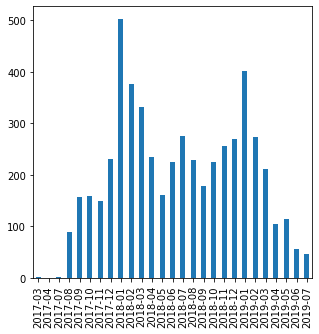

In [203]:
l1ym = (l1data.anio_registro * 100 + l1data.mes_registro).value_counts().sort_index()
l1ym.index = l1ym.index.astype(int).astype(str).map(lambda x: x[0:4] + "-" + x[4:])
l1ym.plot.bar()

In [204]:
l1data["colvol"] = (l1data.notificante == "Colaborador Voluntario (CV)").map(lambda x: "COLVOL" if x else "Otro")

In [215]:
deptoyear = l1data.groupby(["anio_registro", "colvol", "departamento"]).apply(len).unstack([0,1]).fillna(0)

In [206]:
l1data.groupby("anio_registro").apply(len)

anio_registro
2017.0     793
2018.0    3268
2019.0    1211
dtype: int64

In [207]:
temp = l1data.groupby(["anio_registro", "deptocode"]).apply(len).unstack(0)
temp.divide(temp.sum())

anio_registro,2017.0,2018.0,2019.0
deptocode,,,
1.0,0.005044,NaN,NaN
4.0,0.157629,0.126989,0.204789
5.0,0.572509,0.439412,0.613543
7.0,0.065574,0.005202,NaN
9.0,NaN,0.000306,NaN
10.0,0.139975,0.037026,0.022296
11.0,0.005044,0.005508,0.001652
12.0,0.001261,NaN,NaN
13.0,NaN,0.001224,0.001652


In [216]:
deptoyear.index

Index(['EL PETEN', 'ESCUINTLA', 'SUCHITEPEQUEZ', 'ALTA VERAPAZ',
       'CHIMALTENANGO', 'GUATEMALA', 'IZABAL', 'QUICHE', 'RETALHULEU',
       'SAN MARCOS', 'SOLOLA', 'ZACAPA', 'HUEHUETENANGO', 'JALAPA', 'JUTIAPA',
       'QUETZALTENANGO'],
      dtype='object', name='departamento')

In [217]:
deptosL1 = {
    "EL PETEN": 2200,
    'ESCUINTLA': 500, 
    'SUCHITEPEQUEZ': 1000, 
    'ALTA VERAPAZ': 1600,
    'CHIMALTENANGO': 400, 
    'GUATEMALA': 101, 
    'IZABAL': 1800, 
    'QUICHE': 1400, 
    'RETALHULEU': 1100,
    'SAN MARCOS': 1200, 
    'SOLOLA': 700, 
    'ZACAPA': 1900, 
    'HUEHUETENANGO': 1300,
    'JALAPA': 2100,
    'JUTIAPA': 2200,
    'QUETZALTENANGO': 900
}

In [218]:

deptoyear.index = deptoyear.index.map(lambda x: (deptosL1).get(x))

In [219]:
l1data["deptocode"] =np.floor( l1data.departamento.map(deptosL1.get)/100)

In [221]:
deptoyear.columns = ["2017CV", "2017Otro", "2018CV", "2018Otro", "2019CV", "2019Otro"]

In [223]:
for i in [2017,2018, 2019]:
    deptoyear[str(i)+"CVP"] = deptoyear[str(i)+"CV"] / (deptoyear[str(i)+"CV"] + deptoyear[str(i)+"Otro"])

In [224]:
deptoyear.head()

,2017CV,2017Otro,2018CV,2018Otro,2019CV,2019Otro,2017CVP,2018CVP,2019CVP
departamento,,,,,,,,,
2200,2.0,15.0,15.0,132.0,3.0,31.0,0.117647,0.102041,0.088235
500,240.0,214.0,805.0,631.0,358.0,385.0,0.528634,0.560585,0.481830
1000,53.0,58.0,38.0,83.0,5.0,22.0,0.477477,0.314050,0.185185
1600,0.0,21.0,255.0,425.0,59.0,65.0,0.000000,0.375000,0.475806
400,0.0,125.0,0.0,415.0,0.0,248.0,0.000000,0.000000,0.000000


In [225]:
cols = ['sexo', 'pueblo', 'comunidad_linguistica', 
       'discapacidad', 'orientacion_sexual', 'escolaridad',
       'profesion_oficio_condicion', 'agricola_migrante', 'embarazada']

colvolsdata = pd.concat([l1data.groupby([
    "anio_registro", "colvol", x]).apply(len).unstack([0,1]).rename(index = lambda y: x + "-" + y if type(y) == str else y) \
                         for x in cols]) #.rename(index=lambda y: (y[0], x + "-" + y[1])) for x in cols])

In [226]:
colvolsdata.fillna(0)

anio_registro                          2017.0         2018.0         2019.0  \
colvol                                 COLVOL   Otro  COLVOL    Otro COLVOL   
sexo-F                                  128.0  337.0   537.0  1459.0  194.0   
sexo-M                                  167.0  161.0   580.0   692.0  232.0   
pueblo-Maya                               1.0  196.0   260.0   974.0   62.0   
pueblo-Mestizo-Ladino                   258.0  271.0   840.0  1106.0  357.0   
pueblo-No Indica                         36.0   31.0    17.0    70.0    7.0   
pueblo-Otro                               0.0    0.0     0.0     1.0    0.0   
comunidad_linguistica-Ixil                0.0    0.0     0.0     1.0    0.0   
comunidad_linguistica-Jakalteka           0.0    0.0     0.0     1.0    0.0   
comunidad_linguistica-K'iche'             0.0    1.0     0.0    33.0    1.0   
comunidad_linguistica-Kaqchikel           0.0  150.0     0.0   407.0    0.0   
comunidad_linguistica-Mam                 0.0    0.0     0.0     2.0    0.0   
comunidad_linguistica-Mopan               0.0    1.0     0.0     0.0    0.0   
comunidad_linguistica-No indica         294.0  322.0   860.0  1211.0  364.0   
comunidad_linguistica-Q'anjob'al          0.0    0.0     0.0     1.0    0.0   
comunidad_linguistica-Q'eqchi'            1.0   23.0   257.0   437.0   61.0   
comunidad_linguistica-Sakapulteko         0.0    0.0     0.0    58.0    0.0   
comunidad_linguistica-Tz'utujil           0.0    1.0     0.0     0.0    0.0   
discapacidad-                           295.0  498.0  1117.0  2151.0  426.0   
orientacion_sexual-Bisexual               0.0    0.0     0.0     1.0    0.0   
orientacion_sexual-Heterosexual           1.0   59.0     2.0   215.0    3.0   
orientacion_sexual-No aplica            294.0  439.0  1114.0  1933.0  422.0   
orientacion_sexual-Otro                   0.0    0.0     0.0     2.0    1.0   
orientacion_sexual-Trans                  0.0    0.0     1.0     0.0    0.0   
escolaridad-Básicos                       0.0    2.0     1.0    11.0    0.0   
escolaridad-Diversificado                 0.0    1.0     0.0     5.0    0.0   
escolaridad-Ninguno                       0.0    0.0     0.0    13.0    0.0   
escolaridad-No aplica                   294.0  444.0  1095.0  1999.0  420.0   
escolaridad-No indica                     0.0   47.0    13.0    52.0    5.0   
escolaridad-Otro                          0.0    0.0     0.0     1.0    0.0   
escolaridad-Pre Primaria                  0.0    0.0     0.0     2.0    0.0   
escolaridad-Primaria                      1.0    4.0     8.0    68.0    1.0   
profesion_oficio_condicion-Ama de Casa    0.0    1.0     0.0    85.0    0.0   
profesion_oficio_condicion-No aplica    294.0  494.0  1116.0  2061.0  425.0   
profesion_oficio_condicion-Otros          1.0    3.0     1.0     5.0    1.0   
agricola_migrante-SIN DATO              282.0  484.0  1115.0  2132.0  426.0   
agricola_migrante-Sí                     13.0   14.0     2.0    19.0    0.0   
embarazada-                             290.0  330.0  1112.0  1624.0  423.0   
embarazada-Sí                             5.0  168.0     5.0   527.0    3.0   

anio_registro                                  
colvol                                   Otro  
sexo-F                                  516.0  
sexo-M                                  269.0  
pueblo-Maya                             332.0  
pueblo-Mestizo-Ladino                   438.0  
pueblo-No Indica                         15.0  
pueblo-Otro                               0.0  
comunidad_linguistica-Ixil                0.0  
comunidad_linguistica-Jakalteka           0.0  
comunidad_linguistica-K'iche'             0.0  
comunidad_linguistica-Kaqchikel         244.0  
comunidad_linguistica-Mam                 1.0  
comunidad_linguistica-Mopan               0.0  
comunidad_linguistica-No indica         459.0  
comunidad_linguistica-Q'anjob'al          0.0  
comunidad_linguistica-Q'eqchi'           81.0  
comunidad_linguistica-S

In [310]:
# notificaciones por depto y año
notifsNAD = pd.read_csv("../../../../Outcome Measurement Data/MALARIA/Malaria-GTM-Notificaciones_limpio.csv")
notifs = pd.read_csv("../../../../Outcome Measurement Data/MALARIA/Malaria-GTM-NotificacionesDeptoxAño.csv")

In [311]:
notifs

,deptocode,1900.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
0,1,0.0,0.0,3.0,11.0,13.0,6.0,0.0
1,2,0.0,0.0,2.0,0.0,2.0,0.0,0.0
2,4,0.0,0.0,12.0,3.0,2.0,1.0,0.0
3,5,0.0,1.0,3589.0,3199.0,2438.0,1563.0,741.0
4,6,0.0,2.0,71.0,149.0,37.0,11.0,0.0
5,7,0.0,0.0,16.0,10.0,1.0,2.0,0.0
6,9,0.0,0.0,3.0,0.0,0.0,1.0,0.0
7,10,1.0,0.0,152.0,241.0,300.0,223.0,42.0
8,11,0.0,0.0,105.0,75.0,34.0,20.0,3.0
9,12,0.0,0.0,8.0,3.0,8.0,0.0,0.0


In [312]:
notifs.columns = notifs.columns.map(lambda x: "N" + str(int(float(x))) if x != "deptocode" else x)

In [313]:
notifsNAD[notifsNAD["FECHA DE DIANÓSTICO"].astype(str).map(lambda x: not x.startswith("201"))]["FECHA DE DIANÓSTICO"]

1656                     NaN
1657                     NaN
1706                     NaN
8362                     NaN
8727                     NaN
9320                     NaN
9440                     NaN
9780                     NaN
10081                    NaN
10287                    NaN
10734                    NaN
10745                    NaN
10758                    NaN
10905                    NaN
11111                    NaN
11365                    NaN
11402                    NaN
12944                    NaN
13963                    NaN
14008                    NaN
14984                      M
15465                    NaN
15495                    NaN
16092                    NaN
16099                    NaN
16100                    NaN
16101                    NaN
16252                    NaN
16568                    NaN
16901    2001-04-04 00:00:00
17210                    NaN
17251                    NaN
17578                9-14-19
18425            27-03-20198
Name: FECHA DE

In [314]:
notifsNAD["YearMonth"] =  notifsNAD["FECHA DE DIANÓSTICO"].map(lambda x: str(x)[0:7])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


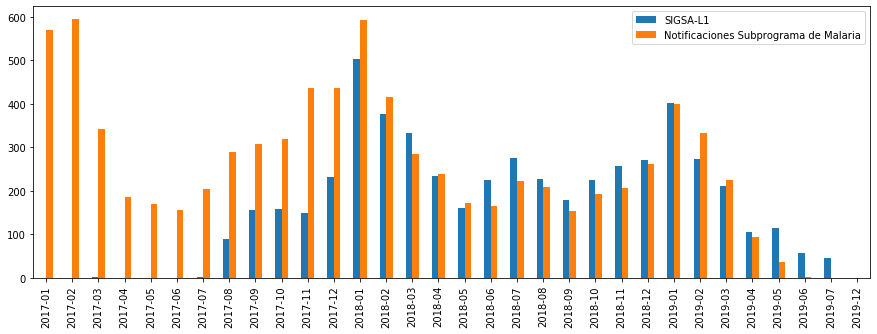

In [315]:
plt.rcParams["figure.figsize"] = (15,5)

temp = pd.concat([l1ym, notifsNAD.groupby("YearMonth").apply(len).sort_index()\
                  [lambda x: x.index.map(lambda x: str(x).startswith("201") & (x != "2014-12") )]], axis=1)
temp.columns=["SIGSA-L1", "Notificaciones Subprograma de Malaria"]
temp[temp.index.map(lambda x: int(x[0:4])>2016)].plot.bar()

In [316]:
temp = pd.concat([notifsNAD.groupby(["Year", "deptocode"]).apply(len).unstack(0)[2017], 
                  l1data.groupby(["anio_registro", "deptocode"]).apply(len).unstack(0)[2017]], 
                 1).fillna(0)
temp.columns = temp.columns=["Notificaciones subprograma de malaria", "SIGSA-L1"]
temp.index = temp.index.map(lambda x: data.deptosGTshp[data.deptosGTshp.deptocode == x].DEPARTAMEN.values[0])

In [317]:
temp["diff"] = temp.iloc[:,0].astype(float)-temp.iloc[:,1].astype(float)

Text(0, 0.5, '')

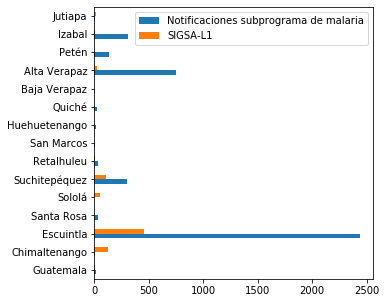

In [318]:
plt.rcParams["figure.figsize"] = (5,5)
temp[np.abs(temp["diff"]) > 5].iloc[:,[0,1]].plot.barh()
plt.ylabel("")

In [319]:
notifsNAD.groupby("Year").apply(len)

Year
2014.0       4
2015.0    5411
2016.0    4805
2017.0    4090
2018.0    3092
2019.0    1032
dtype: int64

In [320]:
temp = notifsNAD.groupby(["Year","deptocode"]).apply(len).unstack(0)
temp.divide(temp.sum())

Year,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
deptocode,,,,,,
1,NaN,0.000554,0.002289,0.003178,0.001940,NaN
2,NaN,0.000370,NaN,0.000489,NaN,NaN
4,NaN,0.002033,0.000624,0.000489,0.000323,NaN
5,0.25,0.662539,0.665557,0.596088,0.505498,0.718023
6,0.50,0.013121,0.031009,0.009046,0.003558,NaN
7,NaN,0.002957,0.002081,0.000244,0.000647,NaN
9,NaN,0.000554,NaN,NaN,0.000323,NaN
10,NaN,0.028091,0.050156,0.073350,0.072122,0.040698
11,NaN,0.019405,0.015609,0.008313,0.006468,0.002907


In [321]:
temp

Year,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
deptocode,,,,,,
1,NaN,3.0,11.0,13.0,6.0,NaN
2,NaN,2.0,NaN,2.0,NaN,NaN
4,NaN,11.0,3.0,2.0,1.0,NaN
5,1.0,3585.0,3198.0,2438.0,1563.0,741.0
6,2.0,71.0,149.0,37.0,11.0,NaN
7,NaN,16.0,10.0,1.0,2.0,NaN
9,NaN,3.0,NaN,NaN,1.0,NaN
10,NaN,152.0,241.0,300.0,223.0,42.0
11,NaN,105.0,75.0,34.0,20.0,3.0


/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


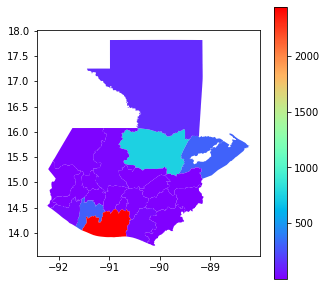

In [322]:
data.deptosGTshp.merge(temp.reset_index(), on = "deptocode", how="left").plot(2017, legend=True, cmap="rainbow")

In [323]:
l1data.groupby(["anio_registro", "deptocode"]).apply(len).unstack(0)[2017]

deptocode
1.0       4.0
4.0     125.0
5.0     454.0
7.0      52.0
9.0       NaN
10.0    111.0
11.0      4.0
12.0      1.0
13.0      NaN
14.0      1.0
16.0     21.0
18.0      2.0
19.0      1.0
21.0      NaN
22.0     17.0
Name: 2017.0, dtype: float64

In [324]:
deptoyear["deptocode"] = np.floor(deptoyear.index/100)

In [325]:
temp = deptoyear.merge(notifs, right_on="deptocode", left_on="deptocode", how="outer")


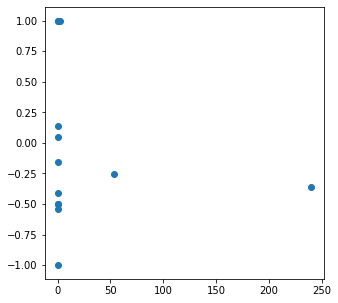

In [326]:
plt.scatter(temp["2017CV"], -1+temp["N2018"]/temp["N2017"])

In [327]:
pd.concat([temp["deptocode"], temp["N2018"], temp["2017CV"], temp["N2018"]/temp["N2017"]], axis=1)

,deptocode,N2018,2017CV,0
0,22.0,6.0,2.0,2.000000
1,22.0,6.0,0.0,2.000000
2,5.0,1563.0,240.0,0.641099
3,10.0,223.0,53.0,0.743333
4,16.0,787.0,0.0,1.047936
5,4.0,1.0,0.0,0.500000
6,1.0,6.0,0.0,0.461538
7,18.0,262.0,0.0,0.839744
8,14.0,25.0,0.0,1.136364
9,11.0,20.0,0.0,0.588235


In [328]:
temp

,2017CV,2017Otro,2018CV,2018Otro,2019CV,2019Otro,2017CVP,2018CVP,2019CVP,deptocode,N1900,N2014,N2015,N2016,N2017,N2018,N2019
0,2.0,15.0,15.0,132.0,3.0,31.0,0.117647,0.102041,0.088235,22.0,0.0,0.0,3.0,3.0,3.0,6.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,NaN,0.000000,NaN,22.0,0.0,0.0,3.0,3.0,3.0,6.0,0.0
2,240.0,214.0,805.0,631.0,358.0,385.0,0.528634,0.560585,0.481830,5.0,0.0,1.0,3589.0,3199.0,2438.0,1563.0,741.0
3,53.0,58.0,38.0,83.0,5.0,22.0,0.477477,0.314050,0.185185,10.0,1.0,0.0,152.0,241.0,300.0,223.0,42.0
4,0.0,21.0,255.0,425.0,59.0,65.0,0.000000,0.375000,0.475806,16.0,2.0,0.0,798.0,544.0,751.0,787.0,124.0
5,0.0,125.0,0.0,415.0,0.0,248.0,0.000000,0.000000,0.000000,4.0,0.0,0.0,12.0,3.0,2.0,1.0,0.0
6,0.0,4.0,0.0,0.0,0.0,0.0,0.000000,NaN,NaN,1.0,0.0,0.0,3.0,11.0,13.0,6.0,0.0
7,0.0,2.0,1.0,27.0,0.0,17.0,0.000000,0.035714,0.000000,18.0,0.0,0.0,391.0,394.0,312.0,262.0,91.0
8,0.0,1.0,1.0,102.0,1.0,2.0,0.000000,0.009709,0.333333,14.0,0.0,0.0,62.0,32.0,22.0,25.0,0.0
9,0.0,4.0,2.0,16.0,0.0,2.0,0.000000,0.111111,0.000000,11.0,0.0,0.0,105.0,75.0,34.0,20.0,3.0


In [329]:
mlp.rcParams['figure.figsize'] = [8, 8]

_i_ = lambda x: x

def mapGT(data_, chlor_col, scatter_col = None, labelChlor = None, labelScatter = None, ax_ = None, normalizeScatterSize = _i_,
          labels_adaptor = None, vmax = None, vmin=0 ):
    temp = data.deptosGTshp.merge(data_, 
                         left_on="deptocode", right_on = "deptocode", how="left" )
    vmax = temp[chlor_col].max()*1.3 if vmax is None else vmax
    
    if ax_ is None:
        ax = plt.axes()
    else:
        ax = ax_
    temp[temp[chlor_col].isna() | (temp[chlor_col]==0) | (np.isinf(temp[chlor_col]))].plot(color="#fffff0", ax= ax) 

    temp[(temp[chlor_col].isna()==False) & (temp[chlor_col]> -np.Inf)].plot(chlor_col, 
                                    vmin = vmin, vmax = vmax,
                                    legend=False, linewidth=0, cmap = "Blues", ax = ax)
    l1 = ax.get_legend()
    for i, depto in data.deptosGTshp.iterrows():
        plt.text(depto.geometry.centroid.x, depto.geometry.centroid.y-0.03, # (depto.geometry.bounds[3]+1.5*depto.geometry.centroid.y)/2.5, 
                 hf.abbreviate(depto.DEPARTAMEN) + ("" if labels_adaptor is None else labels_adaptor(depto)), color="black",
                 horizontalalignment='center', alpha=0.8, fontsize=12)
    if scatter_col is not None:
        temp2 = data.deptosGTshp.merge(data_, 
                             left_on="deptocode", right_on = "deptocode", how="left" )\
            .assign(x = lambda row: row.geometry.centroid.x)\
            .assign(y = lambda row: row.geometry.centroid.y)
        temp2 = temp2[temp2[scatter_col]>0]
        plt.scatter(temp2.x, temp2.y, normalizeScatterSize(temp2[scatter_col]), c = "red", alpha=0.6, linewidths=1.5, edgecolors="black", 
                    label = labelScatter)
        plt.legend(bbox_to_anchor=(1,0))
    
    cmap = plt.get_cmap('Blues')
    norm = mlp.colors.Normalize(vmin=vmin,vmax=vmax)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, shrink = 0.75, boundaries = [int(x) for x in np.linspace(vmin,vmax,10)]) #, ticks=np.linspace(0,vmax,10))
    #cbar.set_ticklabels([ for x in np.linspace(0,vmax,10)])
    cbar.set_label(labelChlor)
    
    data.munisGTshp[(data.munisGTshp.COD_MUNI__.isin([0, None]) == False) & 
                    (data.munisGTshp.COD_DEPT__.isin([0, None]) == False)].plot(edgecolor="#00000099", color="#00000000", linewidth=0.1, ax=ax)
    data.deptosGTshp.plot(edgecolor="#00000055", linewidth=1.5, color="#55555500", ax=ax)

    plt.axis("off")
    plt.tight_layout()


In [330]:
temp["2017CVP"] *= 100 

In [341]:
temp["N2017_B"] = temp["2017CV"] + temp["2017Otro"]

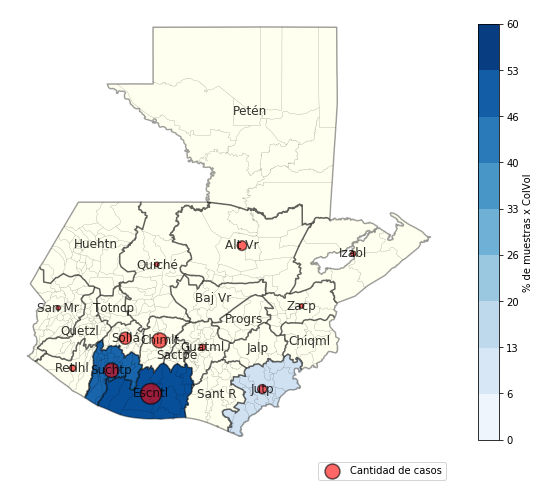

In [343]:
mapGT(temp.replace(0, np.NaN), 
      "2017CVP", "N2017_B", "% de muestras x ColVol", "Cantidad de casos", normalizeScatterSize=lambda x: np.sqrt(x)*20, vmax=60)

In [332]:
temp["2018CVP"] *= 100

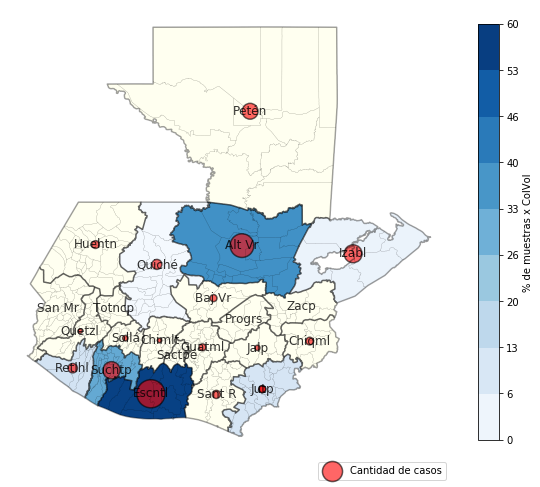

In [339]:
temp["N2018_B"] = temp["2018CV"] + temp["2018Otro"]
mapGT(temp.replace(0, np.NaN), 
      "2018CVP", "N2018", "% de muestras x ColVol", "Cantidad de casos", normalizeScatterSize=lambda x: np.sqrt(x)*20, vmax=60)

In [334]:
temp["2019CVP"] *= 100

In [337]:
temp["N2019_B"] = temp["2019CV"] + temp["2019Otro"]

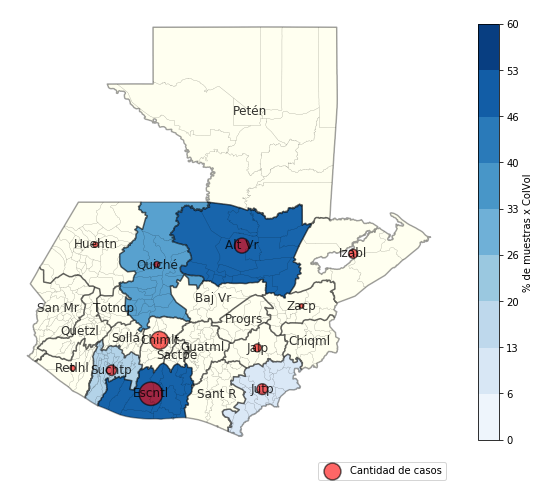

In [340]:
mapGT(temp.replace(0, np.NaN), 
      "2019CVP", "N2019_B", "% de muestras x ColVol", "Cantidad de casos", normalizeScatterSize=lambda x: np.sqrt(x)*20, vmax=60)

In [336]:
temp

,2017CV,2017Otro,2018CV,2018Otro,2019CV,2019Otro,2017CVP,2018CVP,2019CVP,deptocode,N1900,N2014,N2015,N2016,N2017,N2018,N2019
0,2.0,15.0,15.0,132.0,3.0,31.0,11.764706,10.204082,8.823529,22.0,0.0,0.0,3.0,3.0,3.0,6.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,NaN,0.000000,NaN,22.0,0.0,0.0,3.0,3.0,3.0,6.0,0.0
2,240.0,214.0,805.0,631.0,358.0,385.0,52.863436,56.058496,48.183042,5.0,0.0,1.0,3589.0,3199.0,2438.0,1563.0,741.0
3,53.0,58.0,38.0,83.0,5.0,22.0,47.747748,31.404959,18.518519,10.0,1.0,0.0,152.0,241.0,300.0,223.0,42.0
4,0.0,21.0,255.0,425.0,59.0,65.0,0.000000,37.500000,47.580645,16.0,2.0,0.0,798.0,544.0,751.0,787.0,124.0
5,0.0,125.0,0.0,415.0,0.0,248.0,0.000000,0.000000,0.000000,4.0,0.0,0.0,12.0,3.0,2.0,1.0,0.0
6,0.0,4.0,0.0,0.0,0.0,0.0,0.000000,NaN,NaN,1.0,0.0,0.0,3.0,11.0,13.0,6.0,0.0
7,0.0,2.0,1.0,27.0,0.0,17.0,0.000000,3.571429,0.000000,18.0,0.0,0.0,391.0,394.0,312.0,262.0,91.0
8,0.0,1.0,1.0,102.0,1.0,2.0,0.000000,0.970874,33.333333,14.0,0.0,0.0,62.0,32.0,22.0,25.0,0.0
9,0.0,4.0,2.0,16.0,0.0,2.0,0.000000,11.111111,0.000000,11.0,0.0,0.0,105.0,75.0,34.0,20.0,3.0


In [181]:
notifs.sum()

deptocode     223.0
1899.0          6.0
2014.0          4.0
2015.0       5416.0
2016.0       4803.0
2017.0       4091.0
2018.0       3084.0
dtype: float64

In [113]:
l1data.groupby(["anio_registro"]).apply(len).fillna(0)

anio_registro
2017.0     793
2018.0    3268
2019.0    1211
dtype: int64

In [124]:
l1data.groupby(["anio_registro", l1data["fecha_inicio_tratamiento"].notna()]).apply(len).unstack(0)

anio_registro,2017.0,2018.0,2019.0
fecha_inicio_tratamiento,,,
False,241,954,409
True,552,2314,802


In [155]:
l1data.groupby(["anio_registro", l1data["fecha_inicio_tratamiento"].map(lambda x: pd.isna(x)), "completo_tratamiento"]).apply(len).unstack(0)

anio_registro                                  2017.0  2018.0  2019.0
fecha_inicio_tratamiento completo_tratamiento                        
False                                             310    1820     677
                         Sí                       242     494     125
True                                              210     927     405
                         Sí                        31      27       4

Solo salen 521 pacientes que competaron tx en 2018, en la base de datos de notificaciones se encuentran 1452 pacientes con fecha de fin de tratamiento. 

Se tienen 2314 personas con fecha de inicio de tratamiento, en las notificaciones se tiene 2920. 

In [351]:
temp = l1data.groupby(["anio_registro", "prueba_rapida",
                 # "resultado_prueba_rapida",
                   "colvol"]).apply(len).unstack(0)
print(
        temp, "\n\nCon Prueba rápida:\n", 
        temp.apply(lambda x: x[("X", "COLVOL")] / (x[("X", "COLVOL")] + x[("X", "Otro")]) ),
        "\n\nSin Prueba rápida\n\n",
        temp.apply(lambda x: x[(" ", "COLVOL")] / (x[(" ", "COLVOL")] + x[(" ", "Otro")]) )
     )
print(
        temp.apply(lambda x: x[("X", "Otro")] / (x[(" ", "Otro")] + x[("X", "Otro")])  ),
        temp.apply(lambda x: x[("X", "COLVOL")] / (x[(" ", "COLVOL")] + x[("X", "COLVOL")])  )
     )
temp = l1data[l1data.deptocode==5].groupby(["anio_registro", "prueba_rapida",
                 # "resultado_prueba_rapida",
                   "colvol"]).apply(len).unstack(0)
print( "ESCUINTLA\n\n",
        temp.apply(lambda x: x[("X", "Otro")] / (x[(" ", "Otro")] + x[("X", "Otro")])  ),
        temp.apply(lambda x: x[("X", "COLVOL")] / (x[(" ", "COLVOL")] + x[("X", "COLVOL")])  )
     )
temp = l1data[l1data.deptocode==16].groupby(["anio_registro", "prueba_rapida",
                 # "resultado_prueba_rapida",
                   "colvol"]).apply(len).unstack(0)
print(  "AV\n\n",
        temp.apply(lambda x: x[("X", "Otro")] / (x[(" ", "Otro")] + x[("X", "Otro")])  ),
        temp.apply(lambda x: x[("X", "COLVOL")] / (x[(" ", "COLVOL")] + x[("X", "COLVOL")])  )
     )

anio_registro         2017.0  2018.0  2019.0
prueba_rapida colvol                        
              COLVOL      23      86      31
              Otro       280    1153     347
X             COLVOL     272    1031     395
              Otro       218     998     438 

Con Prueba rápida:
 anio_registro
2017.0    0.555102
2018.0    0.508132
2019.0    0.474190
dtype: float64 

Sin Prueba rápida

 anio_registro
2017.0    0.075908
2018.0    0.069411
2019.0    0.082011
dtype: float64
anio_registro
2017.0    0.437751
2018.0    0.463970
2019.0    0.557962
dtype: float64 anio_registro
2017.0    0.922034
2018.0    0.923008
2019.0    0.927230
dtype: float64
ESCUINTLA

 anio_registro
2017.0    0.822430
2018.0    0.803487
2019.0    0.888312
dtype: float64 anio_registro
2017.0    0.987500
2018.0    0.921739
2019.0    0.952514
dtype: float64
AV

 anio_registro
2017.0    0.380952
2018.0    0.682353
2019.0    0.815385
dtype: float64 anio_registro
2017.0         NaN
2018.0    0.972549
2019.0    0.864

In [47]:
temp = l1data.groupby(["anio_registro", "colvol",
                 # "resultado_prueba_rapida",
                   "prueba_rapida"]).apply(len).unstack(0)
temp.apply(lambda x: x[("COLVOL", "X")] / (x[("COLVOL", " ")]+ x[("COLVOL", "X")]))

anio_registro
2017.0    0.922034
2018.0    0.923008
2019.0    0.927230
dtype: float64

In [48]:
temp = l1data.groupby(["anio_registro", "colvol",
                 # "resultado_prueba_rapida",
                   "prueba_rapida"]).apply(len).unstack(0)
temp.apply(lambda x: x[("Otro", "X")] / (x[("Otro", " ")]+ x[("Otro", "X")]))

anio_registro
2017.0    0.437751
2018.0    0.463970
2019.0    0.557962
dtype: float64

In [158]:
temp.to_json()

'{"2017.0":{"["COLVOL"," "]":23,"["COLVOL","X"]":272,"["Otro"," "]":280,"["Otro","X"]":218},"2018.0":{"["COLVOL"," "]":86,"["COLVOL","X"]":1031,"["Otro"," "]":1153,"["Otro","X"]":998},"2019.0":{"["COLVOL"," "]":31,"["COLVOL","X"]":395,"["Otro"," "]":347,"["Otro","X"]":438}}'

In [17]:
l1data.columns

Index(['departamento', 'municipio', 'priorizado', 'area_salud',
       'distrito_salud', 'servicio_salud', 'tipo_servicio', 'laboratorio_id',
       'anio_registro', 'mes_registro', 'mes', 'muestra', 'gota_gruesa',
       'prueba_rapida', 'resultado_prueba_rapida', 'Código paciente', 'cui',
       'sexo', 'pueblo', 'comunidad_linguistica', 'fecha_nacimiento',
       'discapacidad', 'orientacion_sexual', 'escolaridad',
       'profesion_oficio_condicion', 'agricola_migrante', 'embarazada',
       'notificante', 'no_e1', 'fecha_inicio_sintomas', 'fecha_toma_muestras',
       'fecha_diagnostico', 'fecha_inicio_tratamiento',
       'fecha_finalizacion_tratamiento', 'completo_tratamiento',
       'causa_suspension', 'cantidad_entregada_cloroquina',
       'cantidad_entregada_primaquina', 'resultado', 'densidad_parasitaria',
       'gametocitos', 'colvol'],
      dtype='object')

In [362]:
temp = l1data.groupby(["departamento", "municipio", "colvol"]).apply(len).unstack(2)
temp["Total"] = temp.sum(1)

In [382]:
temp["COLVOLP"] = (temp.divide(temp.Total, 0))["COLVOL"]

In [385]:
temp[temp.COLVOL>1].sort_values("COLVOLP", ascending=False).head(20)[["COLVOL", "COLVOLP"]].astype(float)\
.reset_index().sort_values(["departamento", "COLVOLP"], ascending=False)

colvol,departamento,municipio,COLVOL,COLVOLP
2,SUCHITEPEQUEZ,MAZATENANGO,47.0,0.643836
4,SUCHITEPEQUEZ,RÍO BRAVO,9.0,0.500000
11,SUCHITEPEQUEZ,PATULUL,12.0,0.285714
12,SUCHITEPEQUEZ,SANTO DOMINGO SUCHITEPÉQUEZ,18.0,0.276923
14,SUCHITEPEQUEZ,CHICACAO,9.0,0.166667
0,ESCUINTLA,SANTA LUCÍA COTZUMALGUAPA,392.0,0.749522
1,ESCUINTLA,TIQUISATE,194.0,0.683099
3,ESCUINTLA,SIPACATE,93.0,0.600000
5,ESCUINTLA,LA GOMERA,625.0,0.489812
7,ESCUINTLA,MASAGUA,52.0,0.448276


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8e6f38c6d8>,
      dtype=object)

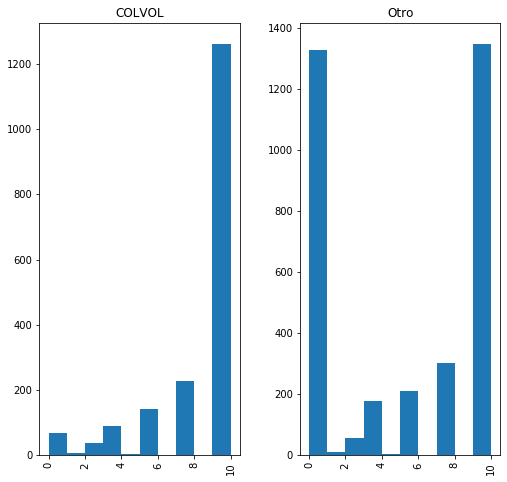

In [377]:
l1data.replace(np.NaN, 0).hist("cantidad_entregada_cloroquina", by="colvol")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0a37491630>,
      dtype=object)

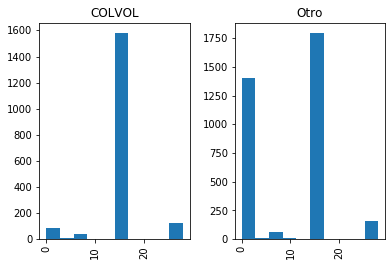

In [42]:
l1data.replace(np.NaN, 0).hist("cantidad_entregada_primaquina", by="colvol")

In [44]:
l1data.tipo_servicio.value_counts()

Centro de atención permanente (CAP)                     1909
Centro de salud tipo B (C/S)                            1535
Puesto de Salud Abierto (P/S)                            984
Centro de salud tipo A (C/S)                             829
Jurisdicción Institucional (J/I)                           8
Centro de atención a pacientes ambulatorios (CENAPA)       6
Puesto de salud fortalecido (PSF)                          1
Name: tipo_servicio, dtype: int64

In [45]:
l1data.notificante.value_counts()

Centro de Salud (C/S)            1904
Colaborador Voluntario (CV)      1838
Polivalente y/o polifuncional     625
Centro microcoscopía              348
Hospital                          195
Puesto de Salud (P/S)             188
Otro                              145
IGSS                               22
Hospital Privado                    5
Sanidad Militar                     1
Cruz Roja                           1
Name: notificante, dtype: int64

In [50]:
pdr = pd.read_excel("../../../../Outcome Measurement Data/MALARIA/Movimientos MTILD y  PDR PERIODO FASE II.xls", 3, skiprows=2)
pdr.columns = ["das", 2015,2016,2017]
pdr["deptocode"] = pdr.das.apply(lambda x: notifs_das2depto.get(x.strip() if type(x) == str else "", np.NaN))
pdr = pdr.groupby("deptocode")[[2015,2016, 2017]].sum()
pdr2 = pdr.copy()

NameError: name 'notifs_das2depto' is not defined